# **CLASE 6 - INTRO A MACHINE LEARNING**

## **Caso de Estudio: El Titanic**

### Diccionario de Datos

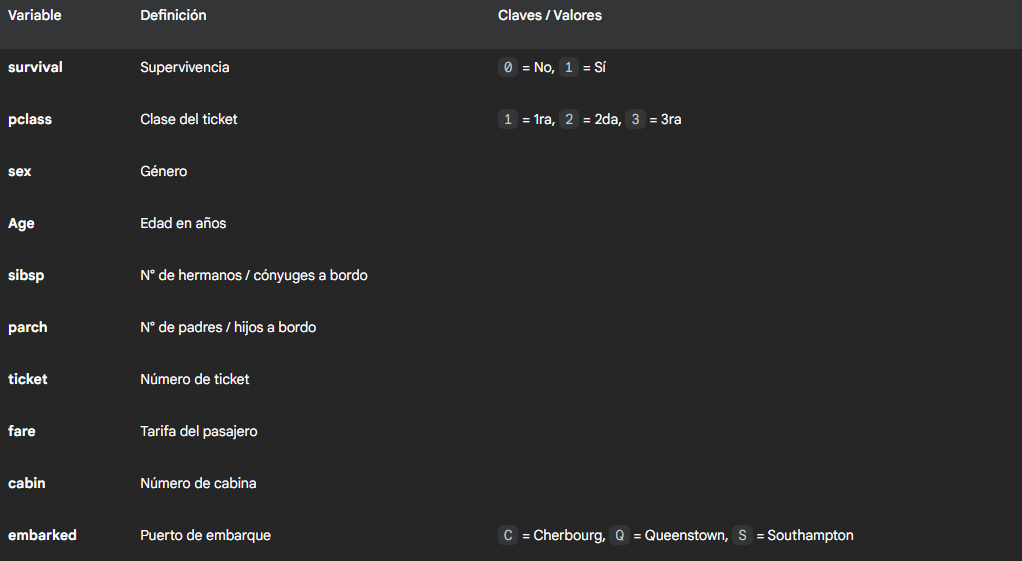

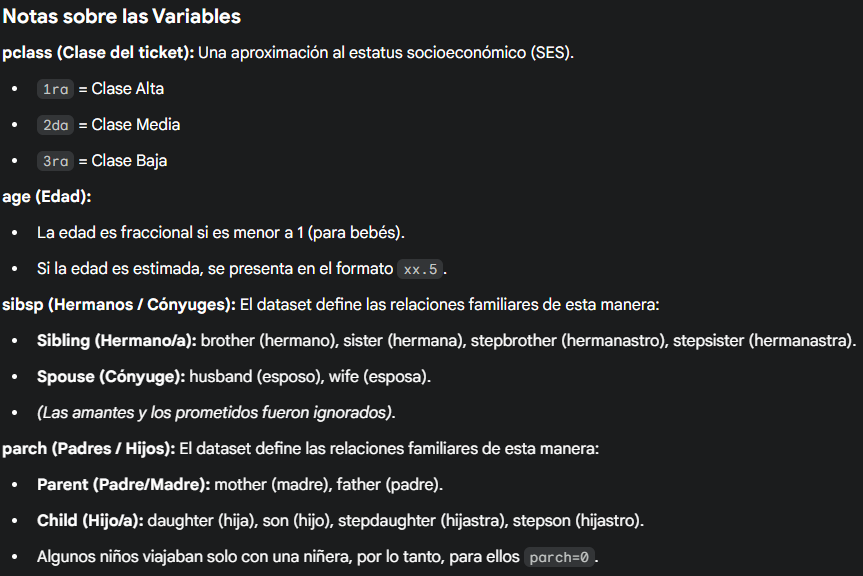

### Importamos librerías

In [1]:
# ---
# Paso 1: Importar Librerías
# ---
# Importamos las herramientas que necesitaremos.
# pandas: para manipulación de datos (nuestros DataFrames)
# matplotlib y seaborn: para visualización (aunque los usaremos más adelante)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Librerías Importadas ---")

--- Librerías Importadas ---


### Carga de datos

In [2]:
# ---
# Paso 2: Cargar los Datos
# ---
# Cargamos nuestros archivos CSV en DataFrames de pandas.


train_df = pd.read_csv('/content/train.csv')

test_df = pd.read_csv('/content/test.csv')

In [3]:
# Damos un primer vistazo a los datos de entrenamiento
print("\nPrimeras 5 filas del dataset de ENTRENAMIENTO (train_df):")
train_df.head()


Primeras 5 filas del dataset de ENTRENAMIENTO (train_df):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Damos un primer vistazo a los datos de testeo
print("\nPrimeras 5 filas del dataset de TESTEO (test_df):")
test_df.head()


Primeras 5 filas del dataset de TESTEO (test_df):


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Revisar la Dimensión (Shape)

In [5]:
# ---
# Paso 3: Revisar la Dimensión (Shape)
# ---
# Vemos cuántas filas (pasajeros) y columnas (features) tenemos.

print("\n--- Paso 3: Dimensión de los Datos ---")
print(f"Dataset de Entrenamiento (Train): {train_df.shape[0]} filas, {train_df.shape[1]} columnas")
print(f"Dataset de Prueba (Test):       {test_df.shape[0]} filas, {test_df.shape[1]} columnas")
print("Observación: El dataset de prueba tiene una columna menos (falta 'Survived').")


--- Paso 3: Dimensión de los Datos ---
Dataset de Entrenamiento (Train): 891 filas, 12 columnas
Dataset de Prueba (Test):       418 filas, 11 columnas
Observación: El dataset de prueba tiene una columna menos (falta 'Survived').


### Controlar Nulos y Tipos de Datos

In [7]:
# ---
# Paso 4: Controlar Nulos y Tipos de Datos
# ---
# Usamos .info() para obtener un resumen crucial de nuestro dataset de entrenamiento.
# - ¿Qué tipo de dato (Dtype) tiene cada columna? (object = texto)
# - ¿Cuántos valores no nulos (Non-Null) hay? (para detectar nulos)

print("\n--- Paso 4: Información de Variables (Nulos y Tipos) ---")
print("Análisis del dataset de ENTRENAMIENTO (train_df.info()):\n")
train_df.info()

print("\nObservaciones de .info():")
print("- 'Age' y 'Cabin' tienen valores nulos (NaNs) que deberemos tratar.")
print("- 'Sex' y 'Embarked' son de tipo 'object' (texto) y deberán ser convertidas a números.")


--- Paso 4: Información de Variables (Nulos y Tipos) ---
Análisis del dataset de ENTRENAMIENTO (train_df.info()):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Observaciones de .info():
- 'Age' y 'Cabin' tienen valores nulos (NaNs) que deberemos tratar.
- 'Sex' y 'Embarked' son de tipo 

### Analizar la Variable Objetivo (Balanceo)

In [9]:
# ---
# Paso 5: Analizar la Variable Objetivo (Balanceo)
# ---
# Revisamos la distribución de nuestra variable objetivo: 'Survived'.
# ¿Cuántos sobrevivieron (1) vs. cuántos no (0)?

print("\n--- Paso 5: Análisis de Balanceo de la Variable 'Survived' ---")
print("Conteo de 'Survived' (0 = No, 1 = Sí):")
print(train_df['Survived'].value_counts())

print("\nPorcentaje de 'Survived':")
# normalize=True nos da los porcentajes
print(train_df['Survived'].value_counts(normalize=True) * 100)

print("\nObservación:")
print("El dataset está desbalanceado (aprox. 61.6% 'No' vs 38.4% 'Sí').")
print("Es un desbalanceo leve, pero debemos tenerlo en cuenta.")


--- Paso 5: Análisis de Balanceo de la Variable 'Survived' ---
Conteo de 'Survived' (0 = No, 1 = Sí):
Survived
0    549
1    342
Name: count, dtype: int64

Porcentaje de 'Survived':
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

Observación:
El dataset está desbalanceado (aprox. 61.6% 'No' vs 38.4% 'Sí').
Es un desbalanceo leve, pero debemos tenerlo en cuenta.


### Visualización del Desbalanceo


Generando gráfico de desbalanceo...


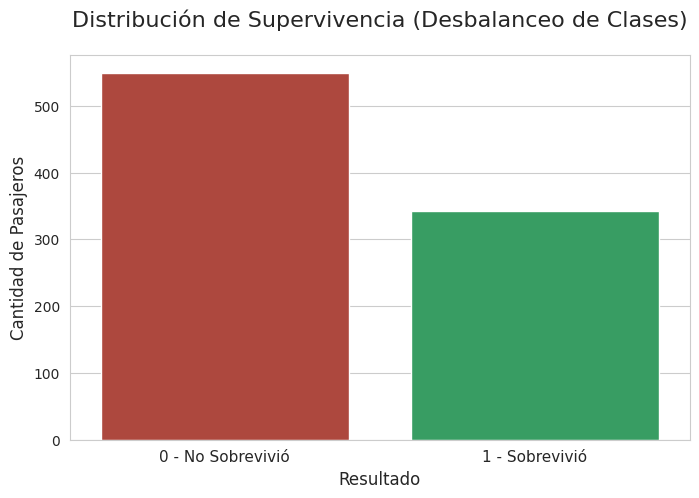


--- Análisis Exploratorio Básico Completo ---


In [12]:
# ---
# # Paso 6: Visualización del Desbalanceo
# ---
print("\nGenerando gráfico de desbalanceo...")

# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear el gráfico de barras
# Usamos 'palette' para dar colores significativos (Rojo=No, Verde=Sí)
plt.figure(figsize=(8, 5)) # Definir tamaño de la figura
ax = sns.countplot(
    x='Survived',
    data=train_df,
    palette=['#c0392b', '#27ae60'], # Colores (Rojo para No, Verde para Sí)
    hue='Survived',   # <-- 1. Asignar 'x' a 'hue' (corrige FutureWarning)
    legend=False      # <-- 2. Poner legend=False (corrige FutureWarning)
)

# Añadir Títulos y Etiquetas
plt.title('Distribución de Supervivencia (Desbalanceo de Clases)', fontsize=16, pad=20)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.xlabel('Resultado', fontsize=12)

# Personalizar las etiquetas del eje X para mayor claridad
plt.xticks(ticks=[0, 1], labels=['0 - No Sobrevivió', '1 - Sobrevivió'], fontsize=11)

# Mostrar el gráfico
plt.show()


print("\n--- Análisis Exploratorio Básico Completo ---")